# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /Users/oliverhebnes/Documents/predicting-solid-state-qubit-material-hosts/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Ferrenti summary"
InsertApproach = "01-ferrenti-approach"
numberOfPrincipalComponents = 5

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,MP|spacegroup.number,MP|total_magnetization,MP|nelements,MP|efermi,MP|Eg,AFLOWML|Eg,MP|Polar SG,candidate
0,mp-7,S6,2.0,16,-0.261676,2.0,16,-0.261676,1.000000,1.000000,...,3.440,0.000070,148,0.000034,1,0.348895,2.4881,2.490,0,1.0
1,mp-14,Se3,2.0,34,-0.245806,2.0,34,-0.245806,1.000000,1.000000,...,3.010,0.000062,152,0.000000,1,1.879425,1.0119,0.997,0,1.0
2,mp-19,Te3,2.0,52,-0.226594,2.0,52,-0.226594,1.000000,1.000000,...,3.166,0.000054,152,0.000000,1,5.455518,0.5752,0.000,0,1.0
3,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,3.223,0.000086,194,0.000000,1,9.983070,3.3395,3.166,0,1.0
4,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,4.279,0.000086,227,0.000000,1,9.614764,4.3387,3.593,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,2.690,0.000052,3,0.000351,4,3.917413,2.3186,2.156,1,0.0
1521,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,2.749,0.000060,1,0.992766,4,3.987258,0.8079,0.000,1,0.0
1522,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,2.841,0.000060,5,6.504784,2,4.184540,0.1221,0.000,1,0.0
1523,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,2.725,0.000061,4,0.000485,3,2.323107,0.5907,0.000,1,0.0


In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

(23676, 11)

In [8]:
Summary[Summary["pretty_formula"].isin(known_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-24,C8,C,1.0,0.944929,0.0,0.000000,1.0,0.779700,1.0,0.967272
42,mp-370,Cd1S1,CdS,1.0,0.973246,1.0,0.936000,1.0,0.983990,1.0,0.998486
44,mp-380,Zn2Se2,ZnSe,1.0,0.966020,1.0,0.936000,1.0,0.991857,1.0,0.994636
82,mp-661,Al2N2,AlN,1.0,0.934265,1.0,0.884615,1.0,0.785010,1.0,0.900423
83,mp-672,Cd2S2,CdS,1.0,0.947446,1.0,0.936000,1.0,0.980104,1.0,0.996159
...,...,...,...,...,...,...,...,...,...,...,...
22989,mp-1202959,Zn18S18,ZnS,1.0,0.954096,1.0,0.936000,1.0,0.884108,1.0,0.984183
23181,mp-1203645,C48,C,1.0,0.524071,1.0,1.000000,1.0,0.815801,1.0,0.990144
23281,mp-1204046,Si106,Si,1.0,0.988128,1.0,0.936000,1.0,0.938049,1.0,0.988326
23351,mp-1204356,Si19C19,SiC,1.0,0.950031,1.0,0.936000,1.0,0.929428,1.0,0.995298


In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
37,mp-344,B4N4,BN,1.0,0.598033,1.0,0.595238,1.0,0.763540,1.0,0.978765
123,mp-984,B2N2,BN,1.0,0.900677,1.0,0.936000,1.0,0.955131,1.0,0.996355
180,mp-1434,Mo1S2,MoS2,1.0,0.757461,1.0,0.595238,1.0,0.589511,1.0,0.655759
202,mp-1599,B4N4,BN,0.0,0.423549,1.0,0.800000,0.0,0.473902,0.0,0.344093
203,mp-1639,B1N1,BN,1.0,0.930310,1.0,0.595238,1.0,0.743185,1.0,0.943237
327,mp-2653,B2N2,BN,1.0,0.879360,1.0,0.595238,1.0,0.711751,1.0,0.782284
1761,mp-7991,B2N2,BN,1.0,0.907107,1.0,1.000000,1.0,0.932398,1.0,0.993847
2322,mp-9813,W1S2,WS2,1.0,0.807277,1.0,0.595238,1.0,0.608312,1.0,0.794500
2830,mp-13151,B4N4,BN,1.0,0.810997,1.0,0.595238,1.0,0.684150,1.0,0.913273
4786,mp-20305,In1As1,InAs,1.0,0.976829,1.0,0.936000,1.0,0.963664,1.0,0.996440


## How many entries does the models agree on? 

In [10]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.809167,1.0,0.691860,1.0,0.770920,1.0,0.937216
2,mp-25,N8,N2,1.0,0.798863,1.0,0.936000,1.0,0.796805,1.0,0.988896
3,mp-111,Ne1,Ne,1.0,0.969071,1.0,0.936000,1.0,0.906922,1.0,0.991896
4,mp-118,P24,P,1.0,0.959488,1.0,0.936000,1.0,0.924103,1.0,0.985204
5,mp-137,Ge12,Ge,1.0,0.990438,1.0,0.936000,1.0,0.979325,1.0,0.997166
...,...,...,...,...,...,...,...,...,...,...,...
23668,mp-1289745,Ba4Fe2Mo2O12,Ba2FeMoO6,1.0,0.927731,1.0,0.985075,1.0,0.990695,1.0,0.996266
23669,mp-1296711,La2Co2O6,LaCoO3,1.0,0.862478,1.0,0.985075,1.0,0.895114,1.0,0.989531
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.739903,1.0,0.595238,1.0,0.797119,1.0,0.868216
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.838221,1.0,0.691860,1.0,0.731694,1.0,0.951088


In [11]:
Summary[(Summary["RF Prob"] > 0.8) & 
        (Summary["DT Prob"] > 0.8) & 
        (Summary["GB Prob"] > 0.8) & 
        (Summary["LOG Prob"] > 0.8)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
3,mp-111,Ne1,Ne,1.0,0.969071,1.0,0.936000,1.0,0.906922,1.0,0.991896
4,mp-118,P24,P,1.0,0.959488,1.0,0.936000,1.0,0.924103,1.0,0.985204
5,mp-137,Ge12,Ge,1.0,0.990438,1.0,0.936000,1.0,0.979325,1.0,0.997166
7,mp-157,P4,P,1.0,0.977009,1.0,0.936000,1.0,0.951263,1.0,0.996653
8,mp-160,B12,B,1.0,0.904937,1.0,1.000000,1.0,0.947581,1.0,0.998068
...,...,...,...,...,...,...,...,...,...,...,...
23660,mp-1249697,Mn8Fe12Si12O48,Mn2Fe3(SiO4)3,1.0,0.878149,1.0,0.865672,1.0,0.925293,1.0,0.986721
23662,mp-1265277,Ca12Mn8Si12O48,Ca3Mn2(SiO4)3,1.0,0.815380,1.0,0.840000,1.0,0.887167,1.0,0.989145
23665,mp-1278154,Sr4Fe2W2O12,Sr2FeWO6,1.0,0.927306,1.0,0.840000,1.0,0.918820,1.0,0.977344
23668,mp-1289745,Ba4Fe2Mo2O12,Ba2FeMoO6,1.0,0.927731,1.0,0.985075,1.0,0.990695,1.0,0.996266


In [12]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.809167,1.0,0.691860,1.0,0.770920,1.0,0.937216
2,mp-25,N8,N2,1.0,0.798863,1.0,0.936000,1.0,0.796805,1.0,0.988896
3,mp-111,Ne1,Ne,1.0,0.969071,1.0,0.936000,1.0,0.906922,1.0,0.991896
4,mp-118,P24,P,1.0,0.959488,1.0,0.936000,1.0,0.924103,1.0,0.985204
5,mp-137,Ge12,Ge,1.0,0.990438,1.0,0.936000,1.0,0.979325,1.0,0.997166
...,...,...,...,...,...,...,...,...,...,...,...
23668,mp-1289745,Ba4Fe2Mo2O12,Ba2FeMoO6,1.0,0.927731,1.0,0.985075,1.0,0.990695,1.0,0.996266
23669,mp-1296711,La2Co2O6,LaCoO3,1.0,0.862478,1.0,0.985075,1.0,0.895114,1.0,0.989531
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.739903,1.0,0.595238,1.0,0.797119,1.0,0.868216
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.838221,1.0,0.691860,1.0,0.731694,1.0,0.951088


In [13]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
2,mp-25,N8,N2,1.0,0.798863,1.0,0.936000,1.0,0.796805,1.0,0.988896
3,mp-111,Ne1,Ne,1.0,0.969071,1.0,0.936000,1.0,0.906922,1.0,0.991896
4,mp-118,P24,P,1.0,0.959488,1.0,0.936000,1.0,0.924103,1.0,0.985204
5,mp-137,Ge12,Ge,1.0,0.990438,1.0,0.936000,1.0,0.979325,1.0,0.997166
6,mp-154,N8,N2,1.0,0.798508,1.0,0.936000,1.0,0.801411,1.0,0.993375
...,...,...,...,...,...,...,...,...,...,...,...
23660,mp-1249697,Mn8Fe12Si12O48,Mn2Fe3(SiO4)3,1.0,0.878149,1.0,0.865672,1.0,0.925293,1.0,0.986721
23662,mp-1265277,Ca12Mn8Si12O48,Ca3Mn2(SiO4)3,1.0,0.815380,1.0,0.840000,1.0,0.887167,1.0,0.989145
23665,mp-1278154,Sr4Fe2W2O12,Sr2FeWO6,1.0,0.927306,1.0,0.840000,1.0,0.918820,1.0,0.977344
23668,mp-1289745,Ba4Fe2Mo2O12,Ba2FeMoO6,1.0,0.927731,1.0,0.985075,1.0,0.990695,1.0,0.996266


In [14]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.809167,1.0,0.691860,1.0,0.770920,1.0,0.937216
1,mp-24,C8,C,1.0,0.944929,0.0,0.000000,1.0,0.779700,1.0,0.967272
2,mp-25,N8,N2,1.0,0.798863,1.0,0.936000,1.0,0.796805,1.0,0.988896
3,mp-111,Ne1,Ne,1.0,0.969071,1.0,0.936000,1.0,0.906922,1.0,0.991896
4,mp-118,P24,P,1.0,0.959488,1.0,0.936000,1.0,0.924103,1.0,0.985204
...,...,...,...,...,...,...,...,...,...,...,...
23668,mp-1289745,Ba4Fe2Mo2O12,Ba2FeMoO6,1.0,0.927731,1.0,0.985075,1.0,0.990695,1.0,0.996266
23669,mp-1296711,La2Co2O6,LaCoO3,1.0,0.862478,1.0,0.985075,1.0,0.895114,1.0,0.989531
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.739903,1.0,0.595238,1.0,0.797119,1.0,0.868216
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.838221,1.0,0.691860,1.0,0.731694,1.0,0.951088


In [15]:
Summary[Summary["LOG "]==1]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.809167,1.0,0.691860,1.0,0.770920,1.0,0.937216
1,mp-24,C8,C,1.0,0.944929,0.0,0.000000,1.0,0.779700,1.0,0.967272
2,mp-25,N8,N2,1.0,0.798863,1.0,0.936000,1.0,0.796805,1.0,0.988896
3,mp-111,Ne1,Ne,1.0,0.969071,1.0,0.936000,1.0,0.906922,1.0,0.991896
4,mp-118,P24,P,1.0,0.959488,1.0,0.936000,1.0,0.924103,1.0,0.985204
...,...,...,...,...,...,...,...,...,...,...,...
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.630610,0.0,0.379085,0.0,0.463766,0.0,0.241928
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.739903,1.0,0.595238,1.0,0.797119,1.0,0.868216
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.838221,1.0,0.691860,1.0,0.731694,1.0,0.951088
23674,mp-1542038,Cs2Sn2Se6,CsSnSe3,1.0,0.599350,1.0,0.595238,1.0,0.550660,0.0,0.269007


In [16]:
generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-11-04-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)

findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


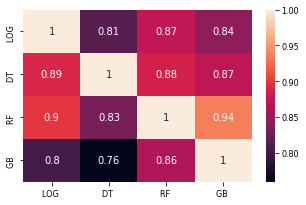

[1.0, 0.8145013723696248, 0.7561756633119854, 0.673604757548033, 0.7591491308325709, 0.8333333333333334, 0.8637099384914212, 1.0, 1.0, 0.8028978266300275, 0.8738264810618324]


,LOG LOG LOG LOG,LOG LOG LOG DT,LOG LOG RF DT,LOG RF GB DT,DT GB DT DT,DT RF DT DT,RF RF GB GB,RF RF RF RF,GB GB GB GB,GB LOG LOG LOG,RF LOG LOG LOG
LOG LOG LOG LOG,1.0,0.814501,0.756176,0.673605,0.759149,0.833333,0.86371,1.0,1.0,0.802898,0.873826
LOG LOG LOG DT,1.0,0.814501,0.756176,0.673605,0.759149,0.833333,0.86371,1.0,1.0,0.802898,0.873826
LOG LOG RF DT,1.0,0.814501,0.756176,0.673605,0.759149,0.833333,0.86371,1.0,1.0,0.802898,0.873826
LOG RF GB DT,1.0,0.814501,0.756176,0.673605,0.759149,0.833333,0.86371,1.0,1.0,0.802898,0.873826
DT GB DT DT,1.0,0.814501,0.756176,0.673605,0.759149,0.833333,0.86371,1.0,1.0,0.802898,0.873826
DT RF DT DT,1.0,0.814501,0.756176,0.673605,0.759149,0.833333,0.86371,1.0,1.0,0.802898,0.873826
RF RF GB GB,1.0,0.814501,0.756176,0.673605,0.759149,0.833333,0.86371,1.0,1.0,0.802898,0.873826
RF RF RF RF,1.0,0.814501,0.756176,0.673605,0.759149,0.833333,0.86371,1.0,1.0,0.802898,0.873826
GB GB GB GB,1.0,0.814501,0.756176,0.673605,0.759149,0.833333,0.86371,1.0,1.0,0.802898,0.873826
GB LOG LOG LOG,1.0,0.814501,0.756176,0.673605,0.759149,0.833333,0.86371,1.0,1.0,0.802898,0.873826


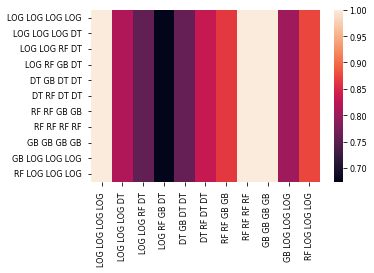

In [17]:
visualize.visualize_heatmap_of_combinations(Summary)

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2800.71it/s]
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


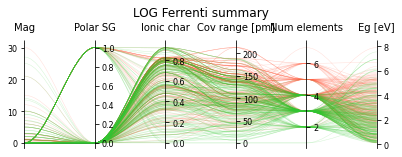

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2255.87it/s]


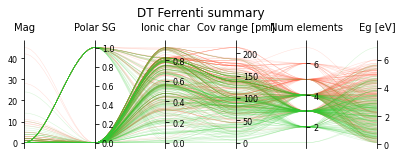

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3132.11it/s]


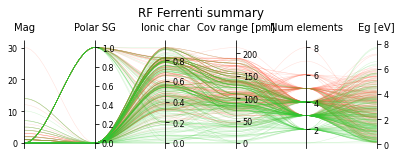

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3189.63it/s]


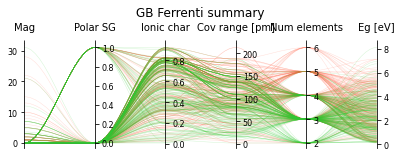

In [19]:
Summary = Summary[Summary["material_id"].isin(generatedData.material_id)].reset_index(drop=True)
generatedData = generatedData[generatedData["material_id"].isin(Summary.material_id)].reset_index(drop=True)
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)